In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

In [2]:
df1 = pd.read_csv('exercise.csv', index_col=0) # Import the csv file as dataframe

In [3]:
df1.head(3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8
14861698,female,20,166.0,60.0,14.0,94.0,40.3
11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [4]:
df1.shape

(15000, 7)

In [5]:
df1.index.unique().shape # There are 15,000 unique examples. 

(15000,)

In [6]:
df2 = pd.read_csv('calories.csv', index_col = 0)

In [7]:
df2.head(3)

,Calories
User_ID,
14733363,231.0
14861698,66.0
11179863,26.0


In [8]:
df = df1.join(df2, how = 'left')

In [9]:
df.shape

(15000, 8)

In [10]:
df.head(3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [11]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

<IPython.core.display.Javascript object>


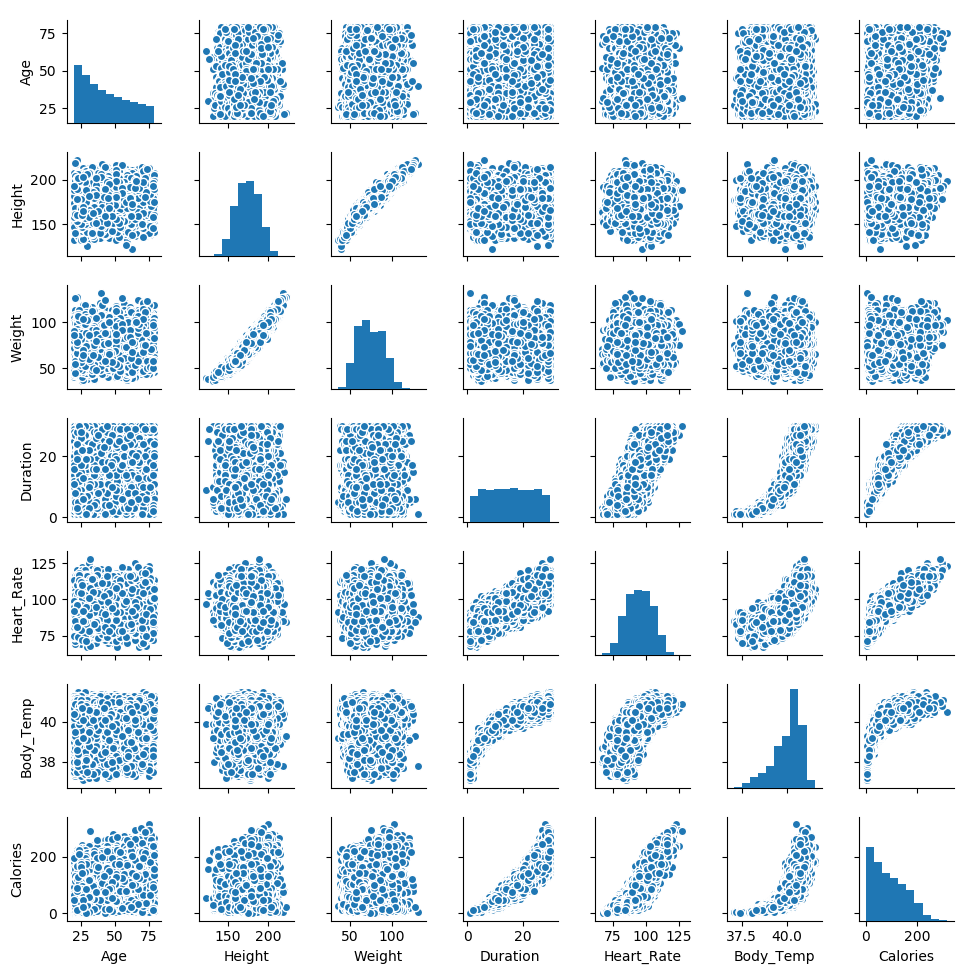

In [12]:
import seaborn as sbn
cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories']
sbn.pairplot(df[cols], size = 1.4)

In [13]:
# Make the Gender features into a categorical variable
df.Gender = df['Gender'].astype('category').cat.codes

In [14]:
df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
df.dtypes

Gender           int8
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [16]:
df["Duration^2"] = df.loc[:,"Duration"].apply(lambda z: np.power(z,2))

In [17]:
df["Heart_Rate^2"] = df.loc[:,"Heart_Rate"].apply(lambda z: np.power(z,2))

In [18]:
df["Calories_ln"] = df.loc[:,"Calories"].apply(lambda z: np.log(z))

In [19]:
np.log

<ufunc 'log'>

In [20]:
df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Duration^2,Heart_Rate^2,Calories_ln
User_ID,,,,,,,,,,,
14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,841.0,11025.0,5.442418
14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,196.0,8836.0,4.189655
11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,25.0,7744.0,3.258097
16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0,169.0,10000.0,4.262680
17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0,100.0,6561.0,3.555348


In [21]:
df = df[['Gender','Age','Height', 'Weight', 'Duration', 'Duration^2', 'Heart_Rate','Heart_Rate^2', 'Body_Temp', 'Calories_ln']]

<IPython.core.display.Javascript object>


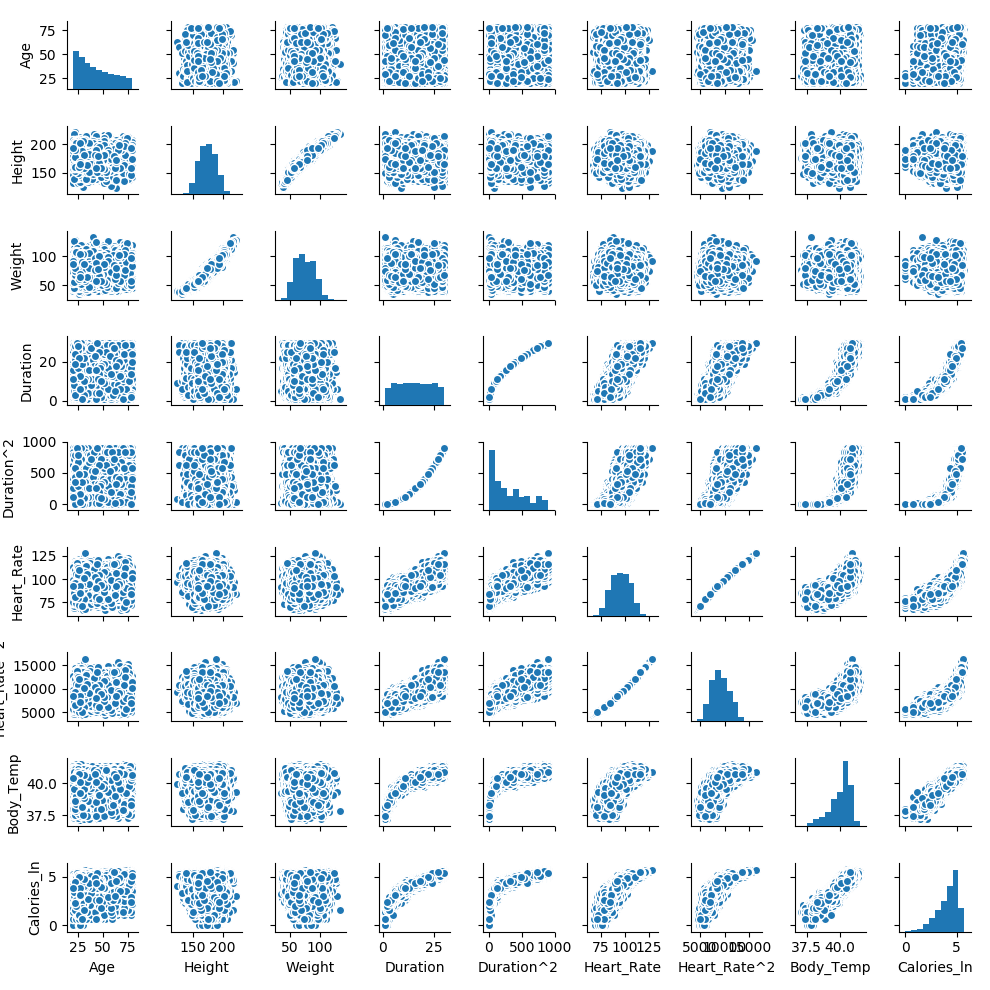

In [22]:
import seaborn as sbn
cols = ['Age','Height', 'Weight', 'Duration', 'Duration^2', 'Heart_Rate','Heart_Rate^2', 'Body_Temp', 'Calories_ln']
sbn.pairplot(df[cols], size = 1.1)

In [23]:
df.head(5)

,Gender,Age,Height,Weight,Duration,Duration^2,Heart_Rate,Heart_Rate^2,Body_Temp,Calories_ln
User_ID,,,,,,,,,,
14733363,1,68,190.0,94.0,29.0,841.0,105.0,11025.0,40.8,5.442418
14861698,0,20,166.0,60.0,14.0,196.0,94.0,8836.0,40.3,4.189655
11179863,1,69,179.0,79.0,5.0,25.0,88.0,7744.0,38.7,3.258097
16180408,0,34,179.0,71.0,13.0,169.0,100.0,10000.0,40.5,4.262680
17771927,0,27,154.0,58.0,10.0,100.0,81.0,6561.0,39.8,3.555348


In [24]:
cols = ['Height', 'Weight',
       'Heart_Rate', 'Heart_Rate^2']
col = ['Age', 'Duration', 'Duration^2',
       'Body_Temp', 'Calories_ln']

In [25]:
from sklearn import preprocessing as prep
df[cols] = prep.StandardScaler().fit_transform(df[cols])
df[col] = prep.MinMaxScaler().fit_transform(df[col])

In [26]:
df.head(5)

,Gender,Age,Height,Weight,Duration,Duration^2,Heart_Rate,Heart_Rate^2,Body_Temp,Calories_ln
User_ID,,,,,,,,,,
14733363,1,0.813559,1.089582,1.265909,0.965517,0.934372,0.989404,0.987193,0.840909,0.946607
14861698,0,0.000000,-0.593726,-0.995458,0.448276,0.216908,-0.158461,-0.207123,0.727273,0.728713
11179863,1,0.830508,0.318066,0.268247,0.137931,0.026696,-0.784569,-0.802917,0.363636,0.566685
16180408,0,0.237288,0.318066,-0.263839,0.413793,0.186874,0.467647,0.427955,0.772727,0.741414
17771927,0,0.118644,-1.435380,-1.128480,0.310345,0.110122,-1.515029,-1.448360,0.613636,0.618387


In [27]:
# splits the data into 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:9]], df[df.columns[-1]], test_size=0.3)

In [28]:
# import the linear regression model and uses it to train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# With the train model we now make prediction of the label for our training data.
y_pred_train = linreg.predict(X_train) 

In [30]:
y_pred_test = linreg.predict(X_test)

In [31]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_train,y_pred_train)
RMSE = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
R_squared = metrics.r2_score(y_train,y_pred_train)
MAE = metrics.mean_absolute_error(y_train,y_pred_train)

print('MAE---', MAE)
print('MSE ---', MSE)
print ('RMSE ---', RMSE)
print ('Coefficient of determination---', R_squared)

MAE--- 0.0200420433194
MSE --- 0.000784385078109
RMSE --- 0.0280068755506
Coefficient of determination--- 0.97402142686


In [32]:
print('Mean Absolute Error (MAE)---', np.sum(np.abs(np.subtract(y_train, y_pred_train)))/y_train.size,'\n')

print('Root Mean Squared Error (RMSE)---',np.sqrt(sum(np.power(np.subtract(y_train, y_pred_train),2))/y_train.size),'\n')

print('Relative Absolute Error (RAE)---',np.sum(np.abs(np.subtract(y_pred_train, y_train)))/np.sum(np.abs(np.subtract(np.mean(y_train), y_train))), '\n')

print('Relative Squared Error (RSE)---',np.sum(np.subtract(y_pred_train,y_train)**2)/np.sum(np.subtract(np.mean(y_pred_train), y_train)**2),'\n')

print('Mean Squared Error (MSE)---',(sum(np.power(np.subtract(y_train, y_pred_train),2))/y_train.size),'\n')


Mean Absolute Error (MAE)--- 0.02004204331944417 

Root Mean Squared Error (RMSE)--- 0.0280068755506 

Relative Absolute Error (RAE)--- 0.14323128934446847 

Relative Squared Error (RSE)--- 0.0259785731398952 

Mean Squared Error (MSE)--- 0.000784385078109 



In [33]:
# Sum of Squares Total
SST = np.sum(np.subtract(y_train,np.mean(y_train))**2)

# Sum of Squares Regression
SSR = np.sum(np.subtract(y_pred_train,np.mean(y_pred_train))**2)

# Sum of Squares Regression
SSE = np.sum(np.subtract(y_train,y_pred_train)**2)

# Coefficient of determination
R_Squared = SSR/SST
#R_Squared = 1 - (SSE/SST)
print ('Coefficient of Determination (R^2)---', R_Squared)

Coefficient of Determination (R^2)--- 0.97402142686


# What you get is proportional to what you put in